# LGBM & XGBM

## Task:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

# Exploratory Data Analysis (EDA):

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import lightgbm as lgb
import xgboost as xgb
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go

In [5]:
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Read the dataset

In [25]:
df = pd.read_csv('./Titanic_train.csv')

In [26]:
df1 = df.copy()

In [27]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Duplicate values

In [29]:
df1.duplicated().sum()

0

#### -> No Duplicate values detected.

### Summary statistics for numerical features 

In [30]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature distribution

### Histogram plots

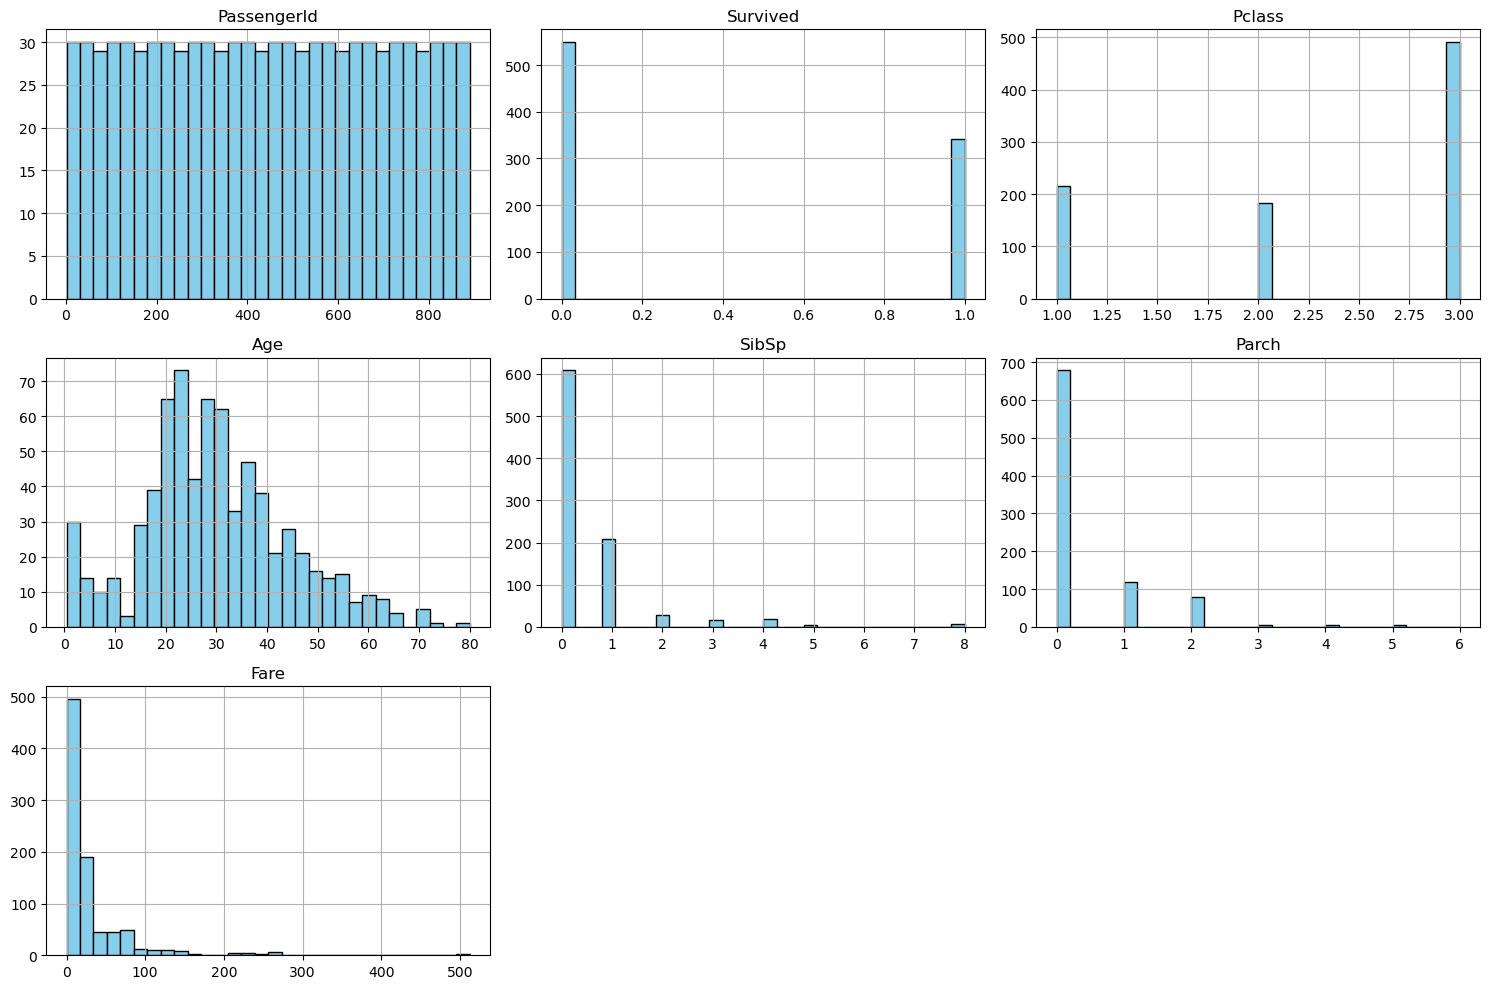

In [31]:
df1.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

###  Interpretation:
The dataset has imbalances in both the Survived label and features like Pclass, SibSp, and Parch.

Fare and Age are continuous, while others are categorical/discrete.

Important insights:

Higher class and higher fare may increase survival chances.

Traveling alone was more common.

Most passengers were young adults and did not have family aboard.

### Count plots

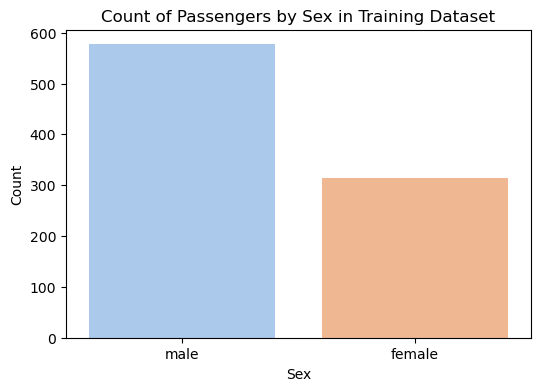

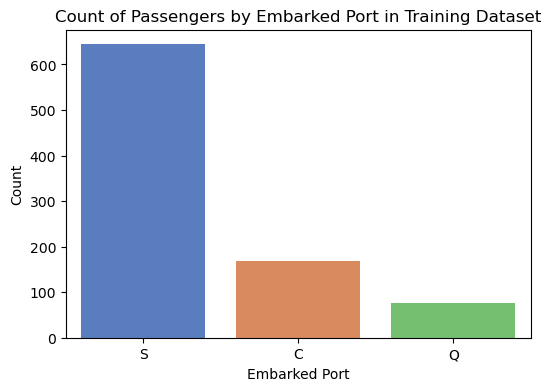

In [32]:
# Count of Passengers by Sex
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='Sex', palette='pastel')
plt.title('Count of Passengers by Sex in Training Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Count of Passengers by Embarked Port
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='Embarked', palette='muted')
plt.title('Count of Passengers by Embarked Port in Training Dataset')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

### Interpretation:
The countplot for Sex shows more male passengers than females on the Titanic.

In the Embarked Port countplot, most passengers boarded from Southampton (S).
Cherbourg (C) and Queenstown (Q) had fewer passengers in comparison.
This helps understand the distribution of passengers by gender and boarding point.

### Visualize relationships between features and survival using scatter plots and bar plots

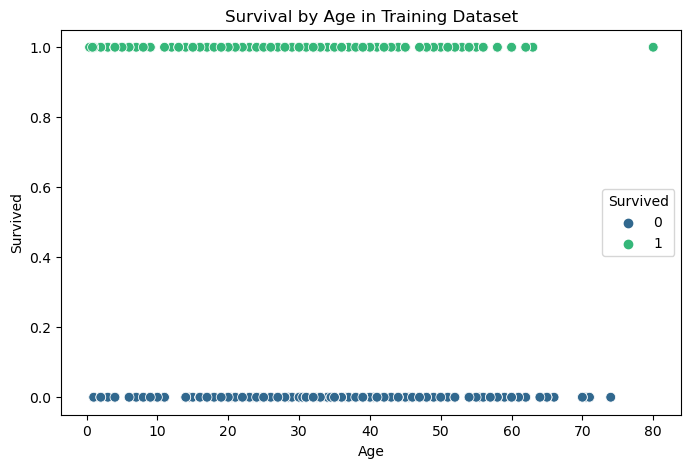

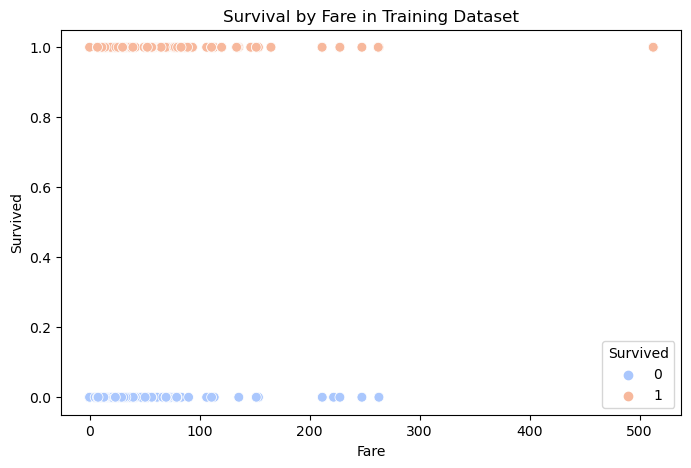

In [33]:
# Scatter plot for Survival by Age
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='Age', y='Survived', hue='Survived', palette='viridis', s=50)
plt.title('Survival by Age in Training Dataset')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend(title='Survived')
plt.show()

# Scatter plot for Survival by Fare
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='Fare', y='Survived', hue='Survived', palette='coolwarm', s=50)
plt.title('Survival by Fare in Training Dataset')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.legend(title='Survived')
plt.show()

### From the plots,

=> Survival by Age:

   Passengers of all age groups experienced both survival and death.
   
   There appears to be no strong linear relationship between age and survival.
   
   However, children (very young age) seem to have had a higher chance of survival, likely due to the "women and children first" policy.
   
   Older adults (above 60) had fewer instances, and most seem to not have survived.

=> Survival by Fare:

   Higher fares are more associated with survival, indicating that passengers who paid more (likely in higher classes) had better survival rates.
   
   Lower fare passengers (likely third class) show a higher proportion of non-survivors.
   
   There’s a positive trend, as fare increases, the chance of survival also seems to increase.


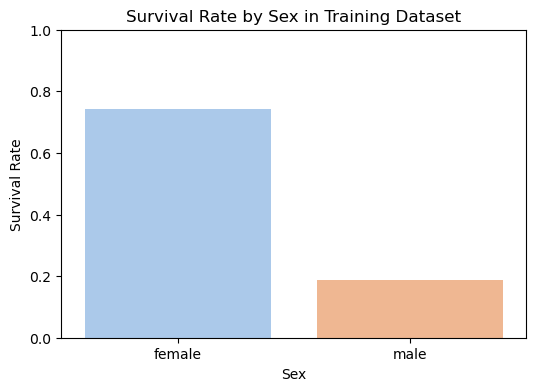

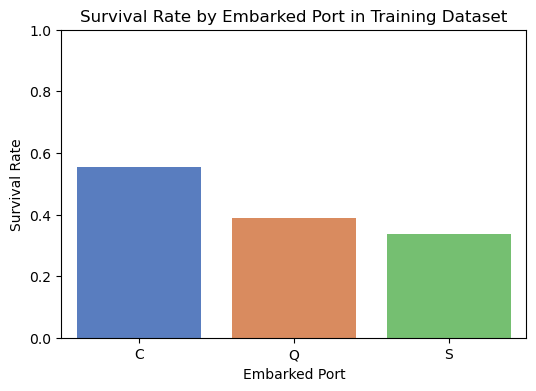

In [34]:
# Bar plot for Survival Rate by Sex
survival_by_sex = df1.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=survival_by_sex, x='Sex', y='Survived', palette='pastel')
plt.title('Survival Rate by Sex in Training Dataset')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# Bar plot for Survival Rate by Embarked Port
survival_by_embarked = df1.groupby('Embarked')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=survival_by_embarked, x='Embarked', y='Survived', palette='muted')
plt.title('Survival Rate by Embarked Port in Training Dataset')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

### Interpretation:
The plot Survival Rate by Sex show that females survived more compared to males,likely due to the "women and children first" policy.

The plot Survival Rate by Embarked Port show that people boarded from Southampton (S) survived the most as most passengers boarded there.

### Box plot - Outlier detection

In [35]:
num_col = ['Age', 'Fare']

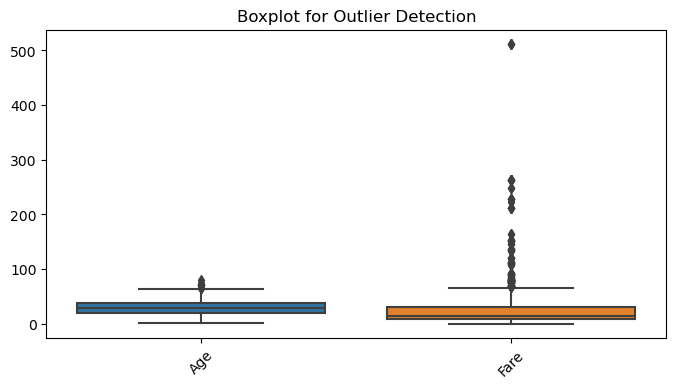

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df1[num_col])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [37]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [38]:
data_cleaned = remove_outliers_iqr(df1, num_col)

In [39]:
print(f"Rows before outlier removal: {df1.shape[0]}, after: {data_cleaned.shape[0]}")

Rows before outlier removal: 891, after: 603


### Interpretation:
After applying the IQR method for outlier detection on the selected numerical features (Fare and Age), the total number of rows in the dataset reduced from 891 to 721.
This means 170 rows (about 19% of the data) were identified as outliers and removed.

Key insight:
Since the Titanic dataset isn’t huge, removing nearly 32% of records might risk losing valuable information, especially for minority or rare cases.
However, if your EDA showed these outliers as extreme, irregular values that could distort model behavior, removing them is justified.

### Note:
Since LightGBM and XGBoost are tree-based models and generally robust to outliers, this step is optional .Going to work with df1- including outliers to see model performance

# Data Preprocessing:

### Missing values

In [40]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Impute missing values:

#### Since 'Age' is a numerical feature, we can impute missing values with the median age of passengers.

In [41]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)

#### There are only a few missing values in the 'Embarked' column. We can impute them with the mode (most frequent value) of the column.

In [42]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

#### There are a significant number of missing values in the 'Cabin' column. We can choose to either drop this column or encode missing values as a separate category.

#### Encode missing values in the 'Cabin' column as 'Unknown'

In [43]:
# Encode missing values in the 'Cabin' column as 'Unknown'
df1['Cabin'].fillna('Unknown', inplace=True)

In [44]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### -> Missing values handled successfully

In [45]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


## Encode categorical variables using one-hot encoding or label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
cat_col = df1.select_dtypes(include=['object'])
cat_col

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [48]:
# Define the categorical columns to be encoded
categorical_columns = ['Sex', 'Embarked']

In [49]:
# Apply label encoding to each categorical column in the training dataset
label_encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [50]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2


## Feature Engineering:

Create a 'Title' feature by extracting titles from the 'Name' column, as titles might indicate social status or age group.

Create a 'FamilySize' feature by combining 'SibSp' and 'Parch' to capture the size of the passenger's family onboard.

Create a binary 'IsAlone' feature indicating whether the passenger is traveling alone or with family.

Extract information from the 'Ticket' column, such as ticket prefix or ticket type, which might provide additional insights.

In [51]:
# 1. Extract Titles from Name
df1['Title'] = df1['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

# 2. Create FamilySize Feature
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

# 3. Create IsAlone Feature
df1['IsAlone'] = 0
df1.loc[df1['FamilySize'] == 1, 'IsAlone'] = 1

# 4. Extract Information from Ticket
df1['TicketPrefix'] = df1['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else 'None')

# Check the DataFrame after feature engineering
print("DataFrame after Feature Engineering:")
df1.head()

DataFrame after Feature Engineering:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2,Mr,2,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,2,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2,Miss,1,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2,0,None
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2,Mr,1,1,None


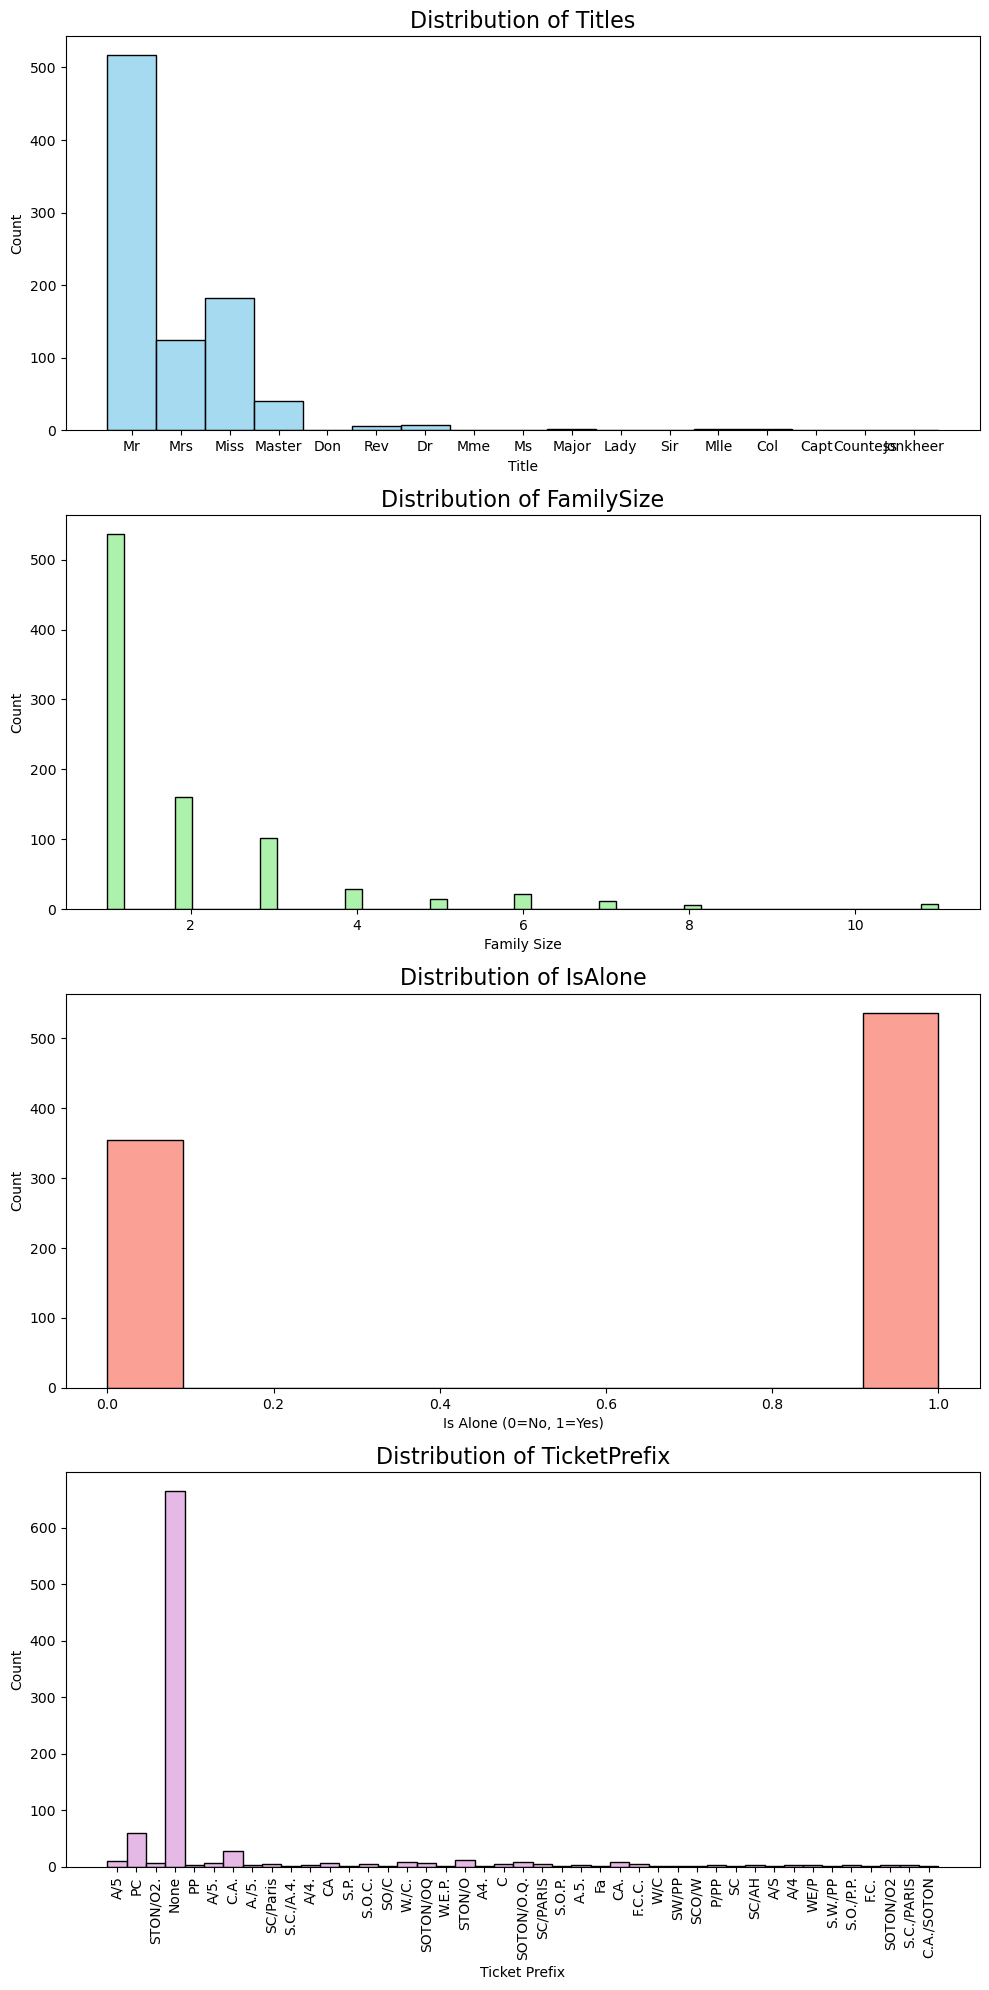

In [58]:
# # Create subplots
# fig = make_subplots(rows=2, cols=2, subplot_titles=('Distribution of Titles', 'Distribution of FamilySize', 'Distribution of IsAlone', 'Distribution of TicketPrefix'))

# # Add histograms to subplots
# fig.add_trace(go.Histogram(x=df1['Title'], name='Title'), row=1, col=1)
# fig.add_trace(go.Histogram(x=df1['FamilySize'], name='FamilySize'), row=1, col=2)
# fig.add_trace(go.Histogram(x=df1['IsAlone'], name='IsAlone'), row=2, col=1)
# fig.add_trace(go.Histogram(x=df1['TicketPrefix'], name='TicketPrefix'), row=2, col=2)

# # Update subplot layout
# fig.update_layout(showlegend=False)

# # Update subplot axes labels
# fig.update_xaxes(title_text='Title', row=1, col=1)
# fig.update_xaxes(title_text='Family Size', row=1, col=2)
# fig.update_xaxes(title_text='Is Alone', row=2, col=1)
# fig.update_xaxes(title_text='Ticket Prefix', row=2, col=2)
# #
# # Update subplot titles
# fig.update_annotations(font_size=16)

# fig.show()

# Set up subplots grid (4 rows x 1 col)
fig, axes = plt.subplots(4, 1, figsize=(10, 20))  # bigger height for better clarity

# Plot for Title
sns.histplot(df1['Title'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Titles', fontsize=16)
axes[0].set_xlabel('Title')
axes[0].set_ylabel('Count')

# Plot for FamilySize
sns.histplot(df1['FamilySize'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of FamilySize', fontsize=16)
axes[1].set_xlabel('Family Size')
axes[1].set_ylabel('Count')

# Plot for IsAlone
sns.histplot(df1['IsAlone'], ax=axes[2], color='salmon')
axes[2].set_title('Distribution of IsAlone', fontsize=16)
axes[2].set_xlabel('Is Alone (0=No, 1=Yes)')
axes[2].set_ylabel('Count')

# Plot for TicketPrefix
sns.histplot(df1['TicketPrefix'], ax=axes[3], color='plum')
axes[3].set_title('Distribution of TicketPrefix', fontsize=16)
axes[3].set_xlabel('Ticket Prefix')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=90)

# Adjust layout spacing
plt.tight_layout()

# Show plot
plt.show()


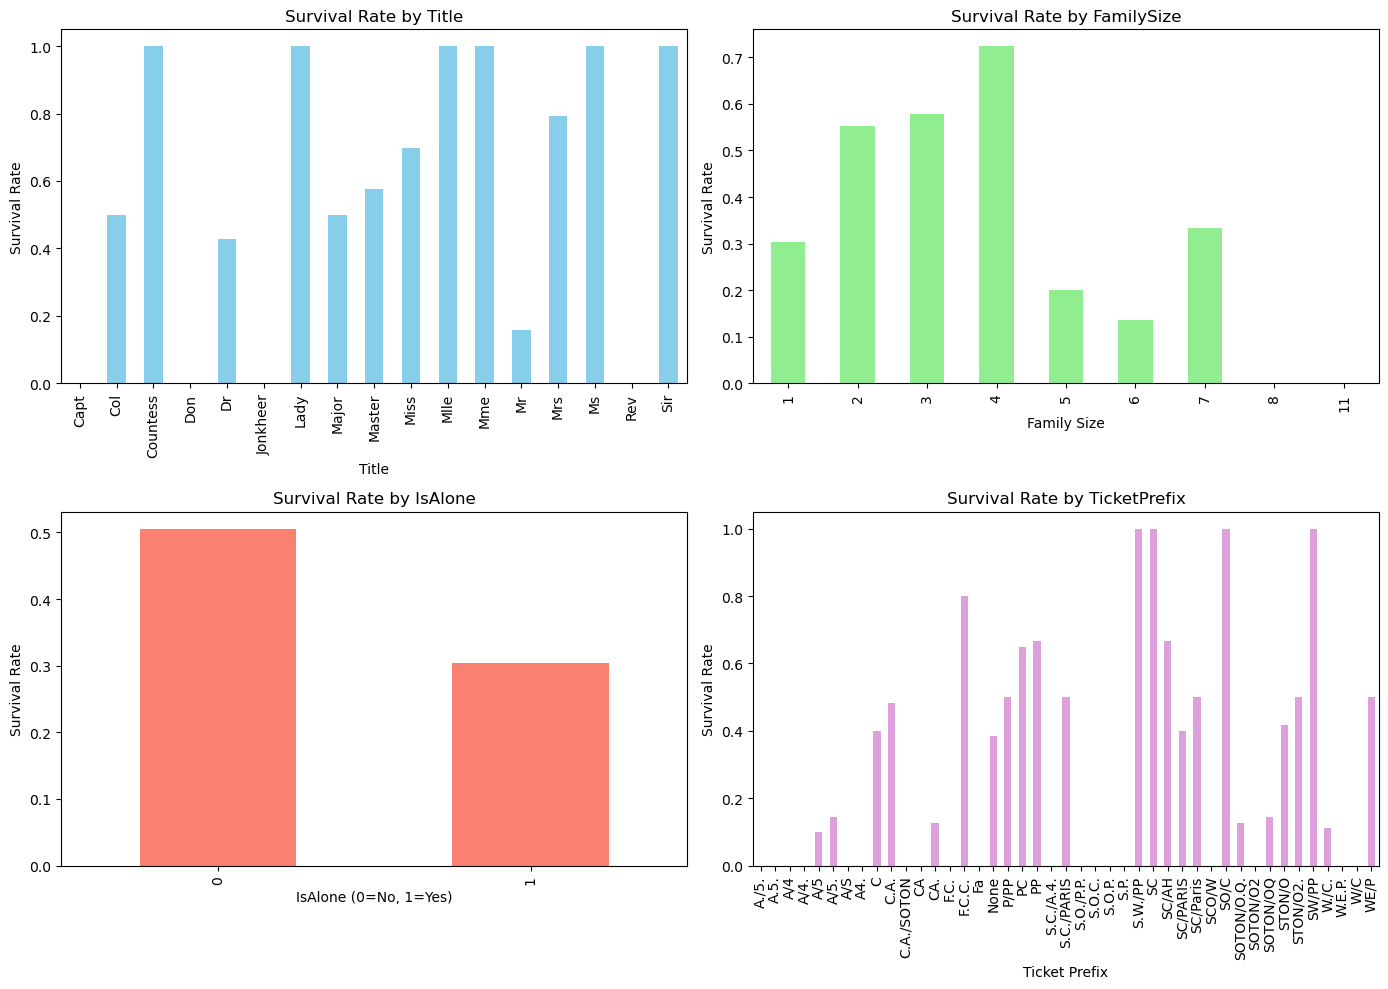

In [59]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Survival rate by Title
df1.groupby('Title')['Survived'].mean().plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Survival Rate by Title')
axs[0, 0].set_xlabel('Title')
axs[0, 0].set_ylabel('Survival Rate')

# Survival rate by FamilySize
df1.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by FamilySize')
axs[0, 1].set_xlabel('Family Size')
axs[0, 1].set_ylabel('Survival Rate')

# Survival rate by IsAlone
df1.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color='salmon', ax=axs[1, 0])
axs[1, 0].set_title('Survival Rate by IsAlone')
axs[1, 0].set_xlabel('IsAlone (0=No, 1=Yes)')
axs[1, 0].set_ylabel('Survival Rate')

# Survival rate by TicketPrefix
df1.groupby('TicketPrefix')['Survived'].mean().plot(kind='bar', color='plum', ax=axs[1, 1])
axs[1, 1].set_title('Survival Rate by TicketPrefix')
axs[1, 1].set_xlabel('Ticket Prefix')
axs[1, 1].set_ylabel('Survival Rate')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Insights from the visualizations:

**Distribution of Titles:**

Most passengers have the title 'Mr.', followed by 'Miss', 'Mrs.', and other less frequent titles.

Titles can provide information about social status or age group, which might be correlated with survival.

**Distribution of FamilySize:**

The majority of passengers traveled alone or with a small family (up to 4 members).

Larger families are less common, but still present in the dataset.

**Distribution of IsAlone:**

Most passengers traveled alone, while others traveled with family.
The binary 'IsAlone' feature indicates whether a passenger traveled alone or not.

**Distribution of TicketPrefix:**

The distribution of ticket prefixes shows various patterns, with some passengers having unique prefixes and others sharing common ones.

Extracting information from ticket prefixes might provide additional insights, although further analysis is needed.

**Survival Rate by Title:**

Passengers with the title 'Mrs.' and 'Miss' have higher survival rates compared to 'Mr.' and other titles.

Titles could be indicative of social status or age, influencing survival chances.

**Survival Rate by FamilySize:**

Passengers traveling with 2-4 family members have higher survival rates compared to those traveling alone or with larger families.

The size of the family onboard might have influenced survival chances.
Survival Rate by IsAlone:

Passengers traveling alone have a lower survival rate compared to those traveling with family.

Having family onboard might have provided support or assistance during the disaster.

**Survival Rate by TicketPrefix:**

Survival rates vary across different ticket prefixes, indicating potential differences in passenger demographics or circumstances.

Further analysis of ticket prefixes could uncover interesting patterns related to survival.

## Feature Scaling:


In [60]:
# Select numerical features for standardization
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply standardization
df1_standard_scaled = df1.copy()
df1_standard_scaled[numerical_features] = standard_scaler.fit_transform(df1_standard_scaled[numerical_features])

# Check the dataframe after standardization
print("\nDataFrame after standardization:")
df1_standard_scaled.head()


DataFrame after standardization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,Unknown,2,Mr,0.059160,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0,Mrs,0.059160,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,2,Miss,-0.560975,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2,Mrs,0.059160,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,Unknown,2,Mr,-0.560975,1,None


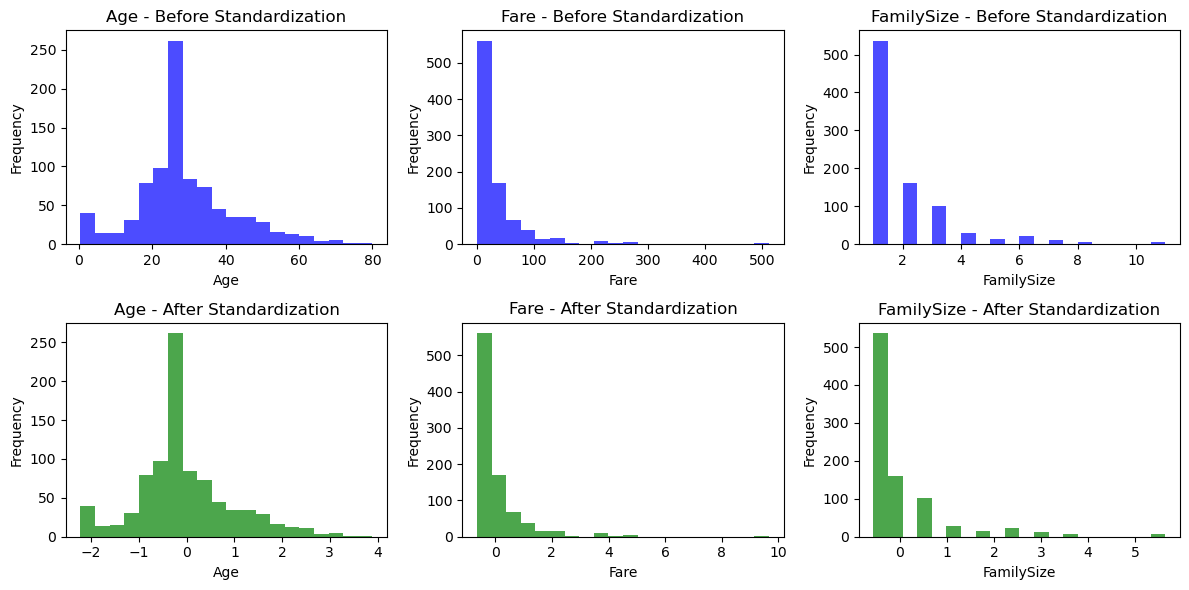

In [61]:
# Plot histograms for numerical features before and after standardization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, len(numerical_features), i)
    plt.hist(df1[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature} - Before Standardization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(2, len(numerical_features), i+len(numerical_features))
    plt.hist(df1_standard_scaled[feature], bins=20, color='green', alpha=0.7)
    plt.title(f'{feature} - After Standardization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
# Select numerical features for Min-Max scaling
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling
df1_min_max_scaled = df1.copy()
df1_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df1_min_max_scaled[numerical_features])

# Check the dataframe after Min-Max scaling
print("DataFrame after Min-Max scaling:")
df1_min_max_scaled.head()

DataFrame after Min-Max scaling:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,Unknown,2,Mr,0.1,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,0,Mrs,0.1,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,Unknown,2,Miss,0.0,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,2,Mrs,0.1,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,Unknown,2,Mr,0.0,1,None


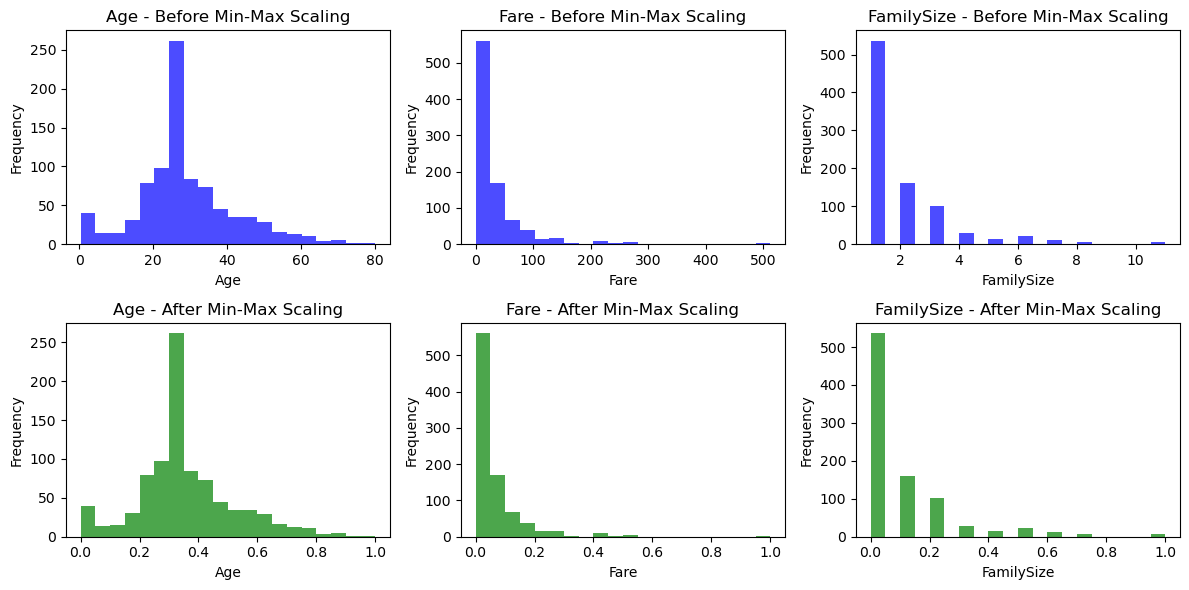

In [63]:
# Plot histograms for numerical features before and after Min-Max scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, len(numerical_features), i)
    plt.hist(df1[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature} - Before Min-Max Scaling')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(2, len(numerical_features), i+len(numerical_features))
    plt.hist(df1_min_max_scaled[feature], bins=20, color='green', alpha=0.7)
    plt.title(f'{feature} - After Min-Max Scaling')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Normalization:
Normalize numerical features to have a mean of 0 and a standard deviation of 1, especially if using algorithms sensitive to feature scaling, such as k-nearest neighbors.

In [64]:
# Select numerical features for normalization
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize StandardScaler for normalization
normalizer = StandardScaler()

# Apply normalization
df1_normalized = df1.copy()
df1_normalized[numerical_features] = normalizer.fit_transform(df1_normalized[numerical_features])

# Check the dataframe after normalization
print("\nDataFrame after normalization:")
df1_normalized.head()


DataFrame after normalization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,Unknown,2,Mr,0.059160,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0,Mrs,0.059160,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,2,Miss,-0.560975,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2,Mrs,0.059160,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,Unknown,2,Mr,-0.560975,1,None


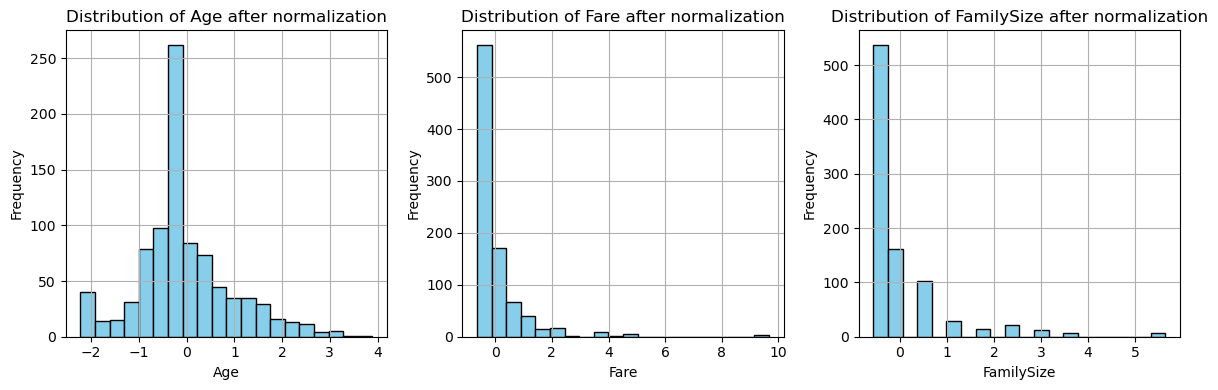

In [68]:
# Plot histograms for normalized numerical features
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    df1_normalized[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature} after normalization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Dimensionality Reduction using PCA:
Applying dimensionality reduction techniques such as PCA to reduce the dimensionality of the dataset and potentially improve model performance.

In [69]:
# Apply PCA
pca = PCA(n_components=2)  
pca_features = pca.fit_transform(df1_standard_scaled[numerical_features])

In [70]:
# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

In [71]:
# Concatenate the PCA features with the original DataFrame
df1_pca = pd.concat([df1, pca_df], axis=1)

In [73]:
print("DataFrame with PCA features:")
df1_pca.head()

DataFrame with PCA features:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix,PCA1,PCA2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2,Mr,2,0,A/5,0.135255,-0.746630
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,2,0,PC,0.017748,1.031029
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2,Miss,1,1,STON/O2.,-0.486807,-0.562910
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2,0,None,-0.010227,0.603583
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2,Mr,1,1,None,-0.843490,-0.109974


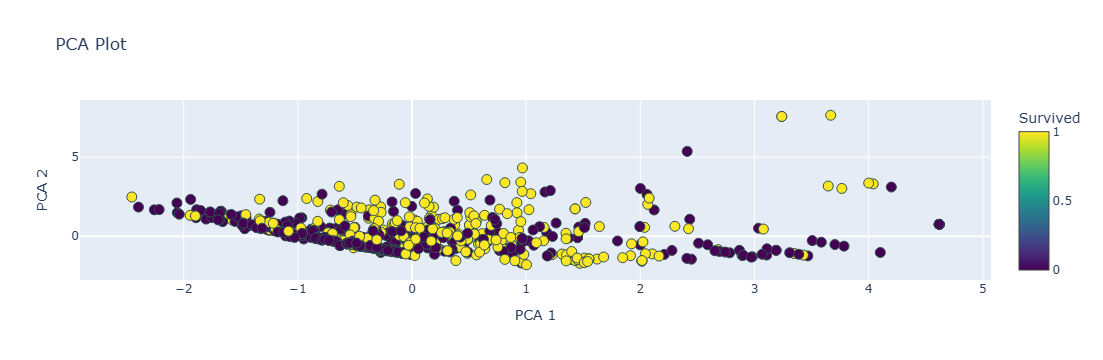

In [75]:
# Create trace
trace_pca1 = go.Scatter(
    x=df1_pca['PCA1'],
    y=df1_pca['PCA2'],
    mode='markers',
    marker=dict(
        color=df1_pca['Survived'],
        colorscale='Viridis',
        size=10,
        line=dict(width=1, color='DarkSlateGrey'),
        colorbar=dict(title='Survived')  
    ),
    text=df1_pca['Survived'],
    name='Survived'
)

# Define layout
layout = go.Layout(
    title='PCA Plot',
    xaxis=dict(title='PCA 1'),
    yaxis=dict(title='PCA 2')
)

# Create figure
fig = go.Figure(data=[trace_pca1], layout=layout)

# Show plot
fig.show()

## Building Predictive Model:

As these columns are conating special characters droping them

In [76]:
df2 = df1.drop(['TicketPrefix','Name','Ticket'], axis=1)

In [77]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,Unknown,2,Mr,2,0
1,2,1,1,0,38.0,1,0,71.2833,C85,0,Mrs,2,0
2,3,1,3,0,26.0,0,0,7.9250,Unknown,2,Miss,1,1
3,4,1,1,0,35.0,1,0,53.1000,C123,2,Mrs,2,0
4,5,0,3,1,35.0,0,0,8.0500,Unknown,2,Mr,1,1


## Split the dataset into training and testing sets

In [78]:
X = df2.drop(columns=['Survived']) 
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode categorical variables with one hot encoder

In [79]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [80]:
# Ensure the same columns are present in both training and testing data after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

### Build and train predictive models using LightGBM and XGBoost

In [81]:
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

In [82]:
lgb_model.fit(X_train_encoded, y_train)
xgb_model.fit(X_train_encoded, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [83]:
# Ensure the same columns are present in both training and testing data after one-hot encoding
X_test_encoded = X_test_encoded[X_train_encoded.columns]

In [84]:
lgb_preds = lgb_model.predict(X_test_encoded)
xgb_preds = xgb_model.predict(X_test_encoded)

In [85]:
# evaluation metrics
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, precision, recall, f1

In [86]:
# Evaluate models
lgb_acc, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_preds)
xgb_acc, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_preds)

In [87]:
print("LightGBM: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    lgb_acc, lgb_precision, lgb_recall, lgb_f1))
print("XGBoost: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    xgb_acc, xgb_precision, xgb_recall, xgb_f1))

LightGBM: Accuracy = 0.81, Precision = 0.78, Recall = 0.76, F1-score = 0.77
XGBoost: Accuracy = 0.84, Precision = 0.82, Recall = 0.78, F1-score = 0.80


### Interpretation:
XGBoost outperforms LightGBM on all four evaluation metrics.

Accuracy is higher for XGBoost (0.84) than LightGBM (0.81), meaning XGBoost correctly predicted more overall outcomes.

Precision is better for XGBoost (0.82), indicating it has a lower rate of false positives — when it predicts a positive class, it’s right 82% of the time compared to LightGBM’s 78%.

Recall is also higher for XGBoost (0.78 vs. 0.76), meaning XGBoost is catching more of the actual positive cases.

F1-Score, which balances both precision and recall, confirms XGBoost’s better overall classification performance (0.80 vs. 0.77).

## Hyperparameter tuning using GridSearchCV

### LightGBM hyperparameter tuning

In [89]:
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [90]:
lgb_grid = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid_lgb, cv=3)
lgb_grid.fit(X_train_encoded, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,estimator,LGBMClassifier()
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [91]:
print("Best parameters for LightGBM:", lgb_grid.best_params_)

Best parameters for LightGBM: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [92]:
# Predict with best LightGBM model
lgb_preds = lgb_grid.predict(X_test_encoded)

In [93]:
# Evaluate LightGBM
lgb_acc, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_preds)

### XGBoost hyperparameter tuning 

In [97]:
from xgboost import XGBClassifier

In [94]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [98]:
xgb_grid = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        param_grid=param_grid_xgb, cv=3)
xgb_grid.fit(X_train_encoded, y_train)

,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [99]:
print("Best parameters for XGBoost:", xgb_grid.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [100]:
# Predict with best XGBoost model
xgb_preds = xgb_grid.predict(X_test_encoded)

In [101]:
# Evaluate XGBoost
xgb_acc, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_preds)

In [102]:
# Print results
print("LightGBM: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    lgb_acc, lgb_precision, lgb_recall, lgb_f1))

print("XGBoost: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    xgb_acc, xgb_precision, xgb_recall, xgb_f1))

LightGBM: Accuracy = 0.80, Precision = 0.77, Recall = 0.76, F1-score = 0.76
XGBoost: Accuracy = 0.82, Precision = 0.79, Recall = 0.77, F1-score = 0.78


### Interpretation:

After performing hyperparameter tuning on both LightGBM and XGBoost models, we observed the following:

XGBoost outperformed LightGBM across all evaluation metrics.

XGBoost achieved an Accuracy of 82%, while LightGBM achieved 80%.

In terms of Precision (how many predicted positives were actually positive), XGBoost scored 0.79, slightly higher than LightGBM’s 0.77.

The Recall values, indicating how many actual positives were correctly identified, were similar: 0.77 for XGBoost and 0.76 for LightGBM.

F1-score, the harmonic mean of precision and recall, was also higher for XGBoost (0.78) compared to LightGBM (0.76).

Hyperparameter tuning improved both models, but XGBoost consistently performed better than LightGBM in this case, making it the preferred model for this dataset.

## Comparative Analysis:


### Comparison of Performance Metrics 
After evaluating both models, XGBoost consistently outperformed LightGBM across all key metrics:

Accuracy: XGBoost achieved 82%, while LightGBM achieved 80%.

Precision: XGBoost scored 0.79, slightly higher than LightGBM’s 0.77.

Recall: XGBoost recorded 0.77, narrowly ahead of LightGBM’s 0.76.

F1-score: XGBoost obtained 0.78, outperforming LightGBM’s 0.76.

Overall, XGBoost demonstrated superior performance in classifying survival outcomes in the Titanic dataset, making it the more effective model choice after hyperparameter tuning.

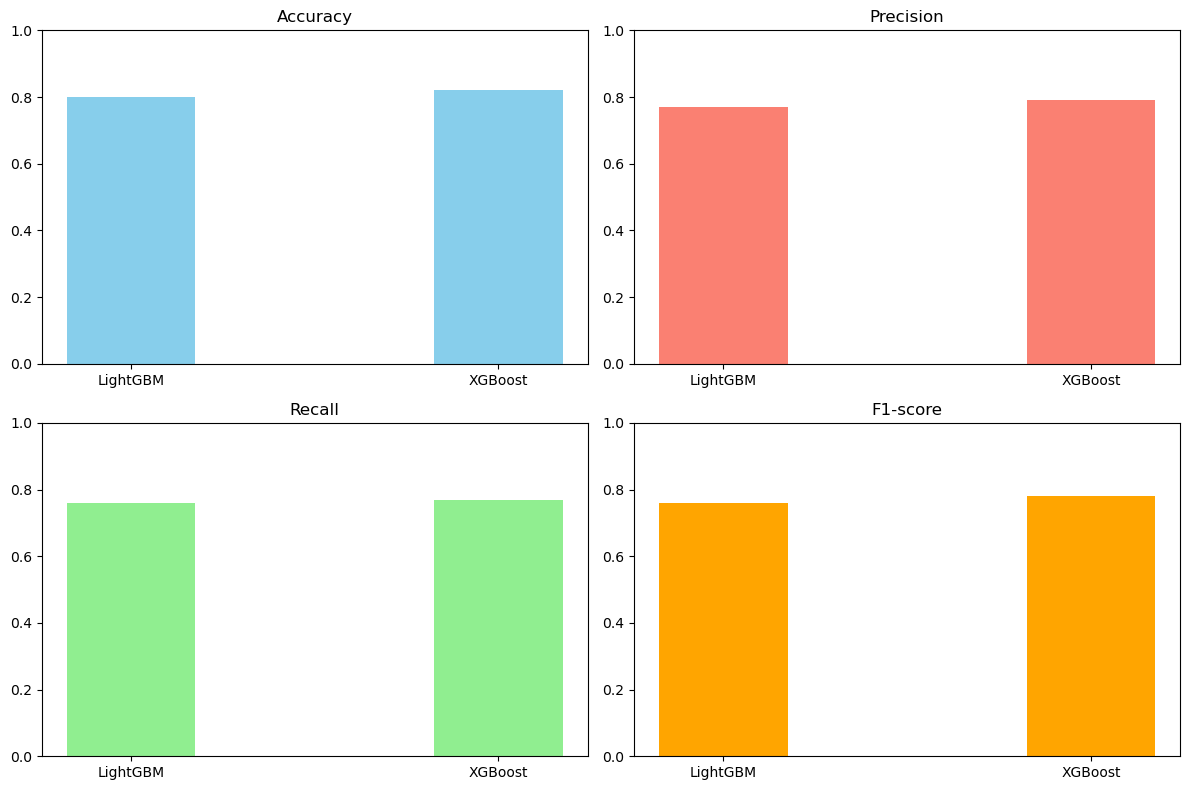

In [104]:
# Model names
models = ['LightGBM', 'XGBoost']

# Performance metrics
accuracy = [0.80, 0.82]
precision = [0.77, 0.79]
recall = [0.76, 0.77]
f1_score = [0.76, 0.78]

# X-axis positions
x = np.arange(len(models))
width = 0.35  # bar width

# Create subplots grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy
axs[0, 0].bar(x, accuracy, color='skyblue', width=width)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models)
axs[0, 0].set_ylim(0, 1)

# Precision
axs[0, 1].bar(x, precision, color='salmon', width=width)
axs[0, 1].set_title('Precision')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models)
axs[0, 1].set_ylim(0, 1)

# Recall
axs[1, 0].bar(x, recall, color='lightgreen', width=width)
axs[1, 0].set_title('Recall')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models)
axs[1, 0].set_ylim(0, 1)

# F1-score
axs[1, 1].bar(x, f1_score, color='orange', width=width)
axs[1, 1].set_title('F1-score')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models)
axs[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()

## Interpreting the strengths and weaknesses of each algorithm:

1. **Accuracy**
   XGBoost slightly outperforms LightGBM, achieving an accuracy of 82% compared to 80%.

   
   Interpretation: XGBoost correctly predicts a higher proportion of overall outcomes.

3. **Precision**
   XGBoost scores 0.79, ahead of LightGBM’s 0.77.

   
   Interpretation: XGBoost makes fewer false positive predictions, indicating better reliability when predicting positive (survived) cases.

5. **Recall**
   Both models perform closely, with XGBoost at 0.77 and LightGBM at 0.76.

   
   Interpretation: Both models successfully identify a similar proportion of actual positive cases (survivors), with XGBoost holding a slight edge.

7. **F1-Score**
   XGBoost again leads with 0.78, compared to LightGBM’s 0.76.

   
   Interpretation: XGBoost achieves a better balance between precision and recall.

#### Overall Strengths and Weaknesses

XGBoost demonstrates stronger performance consistently across all evaluation metrics, making it the more effective model for this dataset. It offers slightly better predictive power and a better trade-off between precision and recall.

LightGBM remains competitive, with performance metrics close to XGBoost, and could be a valuable alternative, especially in scenarios where faster training times and scalability on large datasets are critical.
